In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('new.xlsx')
df=pd.DataFrame(data)

In [3]:
dataset=df[['N','P','K','n1','p1','k1']]
dataset.to_csv('New_data.csv')

In [4]:
df=pd.read_csv('New_data.csv')
df

,Unnamed: 0,N,P,K,n1,p1,k1
0,0,80.0,8.0,123.0,low,low,low
1,1,85.0,8.0,86.0,low,low,low
2,2,100.0,8.0,125.0,low,low,low
3,3,90.0,7.0,185.0,low,low,low
4,4,80.0,8.0,123.0,low,low,low
...,...,...,...,...,...,...,...
435,435,202.5,12.5,537.5,low,high,low
436,436,202.5,15.0,557.5,low,high,low
437,437,227.5,15.0,732.5,low,high,medium
438,438,280.0,12.5,700.0,low,high,medium


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df

,N,P,K,n1,p1,k1
0,80.0,8.0,123.0,low,low,low
1,85.0,8.0,86.0,low,low,low
2,100.0,8.0,125.0,low,low,low
3,90.0,7.0,185.0,low,low,low
4,80.0,8.0,123.0,low,low,low
...,...,...,...,...,...,...
435,202.5,12.5,537.5,low,high,low
436,202.5,15.0,557.5,low,high,low
437,227.5,15.0,732.5,low,high,medium
438,280.0,12.5,700.0,low,high,medium


In [7]:
df.isnull().sum()

N      0
P     32
K      1
n1    32
p1     0
k1     1
dtype: int64

In [8]:
df1=df.fillna(method='ffill')

In [9]:
df1.isnull().sum()

N     0
P     0
K     0
n1    0
p1    0
k1    0
dtype: int64

In [10]:
df1.dtypes

N     float64
P     float64
K     float64
n1     object
p1     object
k1     object
dtype: object

In [11]:
df1=df1.astype({'N':'int','P':'int','K':'int'})

In [12]:
df1.describe()

,N,P,K
count,440.000000,440.000000,440.000000
mean,182.018182,15.159091,526.445455
std,53.216450,8.154385,359.858073
min,9.000000,5.000000,78.000000
25%,155.000000,8.000000,360.250000
50%,195.000000,12.000000,537.000000
75%,215.000000,20.000000,687.750000
max,340.000000,42.000000,5590.000000


**Label Encoding**

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label=preprocessing.LabelEncoder()
df1['n1']=label.fit_transform(df1['n1'])
df1['p1']=label.fit_transform(df1['p1'])
df1['k1']=label.fit_transform(df1['k1'])

In [14]:
df1['n1'].value_counts()

1    286
0     79
2     75
Name: n1, dtype: int64

**Features and Target Variable is *N* and *n1* data**


In [15]:
x=df1[['N']]
y=df1['n1']

**Spliting the Model for Train and Test using sklearn**

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

**KNN Model** *for N and n1 data*

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred=KNN.predict(x_test)

**Generating Classification Report from sklearn** 

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.30      0.22        20
           1       0.77      0.75      0.76        92
           2       0.00      0.00      0.00        20

    accuracy                           0.57       132
   macro avg       0.31      0.35      0.33       132
weighted avg       0.56      0.57      0.56       132

[[ 6 12  2]
 [17 69  6]
 [11  9  0]]


In [20]:
print('The Accuracy:',accuracy_score(y_test, y_pred))

The Accuracy: 0.5681818181818182


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


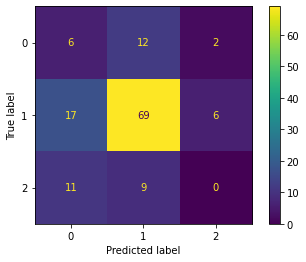

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN, x_test, y_test) 

**SVM Model** *for N and n1 data*

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [23]:
y_pred=svclassifier.predict(x_test)

**Evaluation**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 20  0]
 [ 0 92  0]
 [ 0 20  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.70      1.00      0.82        92
           2       0.00      0.00      0.00        20

    accuracy                           0.70       132
   macro avg       0.23      0.33      0.27       132
weighted avg       0.49      0.70      0.57       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


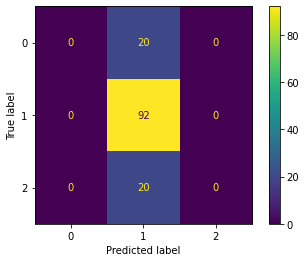

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, x_test, y_test) 

**Decision Tree Model** *for N and n1 data*

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf1=clf.fit(x_train,y_train)
y_pred=clf1.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.20      0.19        20
           1       0.72      0.82      0.77        92
           2       0.00      0.00      0.00        20

    accuracy                           0.60       132
   macro avg       0.30      0.34      0.32       132
weighted avg       0.53      0.60      0.56       132

[[ 4 16  0]
 [12 75  5]
 [ 7 13  0]]


In [29]:
from sklearn import metrics
print('The Accuracy:',metrics.accuracy_score(y_test,y_pred))

The Accuracy: 0.5984848484848485


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


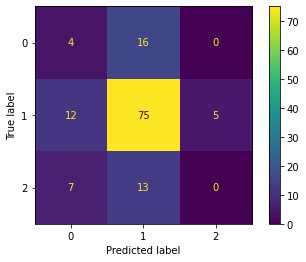

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  

**Naive Bayes Classification** *for N and n1 data*

In [31]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
nb_clf=NB.fit(x_train,y_train)
y_pred=nb_clf.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 20  0]
 [ 0 92  0]
 [ 0 20  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.70      1.00      0.82        92
           2       0.00      0.00      0.00        20

    accuracy                           0.70       132
   macro avg       0.23      0.33      0.27       132
weighted avg       0.49      0.70      0.57       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print('The Accuracy:',metrics.accuracy_score(y_test,y_pred))

The Accuracy: 0.696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


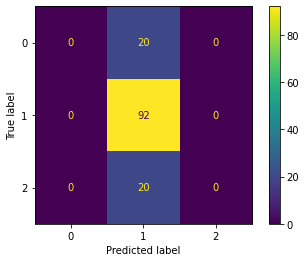

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_clf, x_test, y_test) 

**ANN Model** *for N and n1 data*

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [36]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[ 0 20  0]
 [ 0 92  0]
 [ 0 20  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.70      1.00      0.82        92
           2       0.00      0.00      0.00        20

    accuracy                           0.70       132
   macro avg       0.23      0.33      0.27       132
weighted avg       0.49      0.70      0.57       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


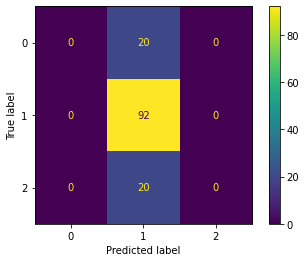

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, x_test, y_test) 

In [38]:
from sklearn.metrics import accuracy_score,r2_score
print('The Accuracy:',accuracy_score(y_test,predict_test))

The Accuracy: 0.696969696969697


**The Accuracy Scores of N and n1 data as follows:**

KNN Model : 0.56

SVM Model : 0.69

DT Model : 0.59

NB Model : 0.69

ANN Model : 0.69


**for P and p1 data**

**Feature and Taget Variable is *P* and  *p1***

In [39]:
x=df1[['P']]
y=df1['p1']

**spliting the datas for Train and Test**

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)

**KNN Model for P and p1 data**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier(n_neighbors=3)
KNN1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred=KNN1.predict(x_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62        72
           1       1.00      0.63      0.77        27
           2       0.34      0.42      0.38        33

    accuracy                           0.58       132
   macro avg       0.65      0.56      0.59       132
weighted avg       0.62      0.58      0.59       132

[[45  0 27]
 [10 17  0]
 [19  0 14]]


In [44]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.5757575757575758


**SVM Model:**

In [45]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [46]:
y_pred=svclassifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  5 25]
 [ 0 27  0]
 [16  2 15]]
              precision    recall  f1-score   support

           0       0.72      0.58      0.65        72
           1       0.79      1.00      0.89        27
           2       0.38      0.45      0.41        33

    accuracy                           0.64       132
   macro avg       0.63      0.68      0.65       132
weighted avg       0.65      0.64      0.64       132



In [48]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.6363636363636364


**DT Model**

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf1=clf.fit(x_train,y_train)
y_pred=clf1.predict(x_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        72
           1       0.81      0.96      0.88        27
           2       0.38      0.27      0.32        33

    accuracy                           0.66       132
   macro avg       0.62      0.65      0.63       132
weighted avg       0.63      0.66      0.64       132

[[52  5 15]
 [ 1 26  0]
 [23  1  9]]


In [51]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.6590909090909091


**NB Model**

In [52]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
nb_clf=NB.fit(x_train,y_train)
y_pred=nb_clf.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[42 16 14]
 [ 0 27  0]
 [16  9  8]]
              precision    recall  f1-score   support

           0       0.72      0.58      0.65        72
           1       0.52      1.00      0.68        27
           2       0.36      0.24      0.29        33

    accuracy                           0.58       132
   macro avg       0.54      0.61      0.54       132
weighted avg       0.59      0.58      0.56       132



In [54]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.5833333333333334


**ANN Model**

In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [56]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [57]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[42  5 25]
 [ 1 26  0]
 [17  1 15]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        72
           1       0.81      0.96      0.88        27
           2       0.38      0.45      0.41        33

    accuracy                           0.63       132
   macro avg       0.63      0.67      0.64       132
weighted avg       0.64      0.63      0.63       132



In [58]:
print('The Accuracy:',accuracy_score(y_test,predict_test))

The Accuracy: 0.6287878787878788


**The Accuracy for P and p1 data as follows:**

KNN Model : 0.58

SVM Model: 0.63

DT Model : 0.65

NB Model : 0.58

ANN Model : 0.62

**for K and k1**

**Feature and Target variables**

In [79]:
x=df1[['K']]
y=df1['k1']

**Spliting the Data in Train and Test**

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=70)

**KNN Model for K and k1**

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier(n_neighbors=3)
KNN1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred=KNN1.predict(x_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.99      1.00      1.00       104
           2       1.00      0.96      0.98        24

    accuracy                           0.99       132
   macro avg       1.00      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

[[  4   0   0]
 [  0 104   0]
 [  0   1  23]]


In [84]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.9924242424242424


**SVM Model**

In [85]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [86]:
y_pred=svclassifier.predict(x_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  3   1   0]
 [  0 104   0]
 [  0   1  23]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.98      1.00      0.99       104
           2       1.00      0.96      0.98        24

    accuracy                           0.98       132
   macro avg       0.99      0.90      0.94       132
weighted avg       0.99      0.98      0.98       132



In [88]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.9848484848484849


**DT Model**

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf1=clf.fit(x_train,y_train)
y_pred=clf1.predict(x_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.99      1.00      1.00       104
           2       1.00      0.96      0.98        24

    accuracy                           0.99       132
   macro avg       1.00      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

[[  4   0   0]
 [  0 104   0]
 [  0   1  23]]


In [91]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.9924242424242424


**NB Model**

In [92]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
nb_clf=NB.fit(x_train,y_train)
y_pred=nb_clf.predict(x_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  3   1   0]
 [  0 104   0]
 [  0   2  22]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.97      1.00      0.99       104
           2       1.00      0.92      0.96        24

    accuracy                           0.98       132
   macro avg       0.99      0.89      0.93       132
weighted avg       0.98      0.98      0.98       132



In [94]:
print('The Accuracy:',accuracy_score(y_test,y_pred))

The Accuracy: 0.9772727272727273


**ANN Model**

In [95]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [76]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [96]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[ 0  4  0]
 [ 0 78 26]
 [ 0 24  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.74      0.75      0.74       104
           2       0.00      0.00      0.00        24

    accuracy                           0.59       132
   macro avg       0.25      0.25      0.25       132
weighted avg       0.58      0.59      0.59       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print('The Accuracy:',accuracy_score(y_test,predict_test))

The Accuracy: 0.5909090909090909


**The Accuracy for K and k1 Data as follows:**

KNN Model : 0.99

SVM Model : 0.98

DT Model : 0.99

NB Model : 0.97

ANN Model : 0.59

**Comparing to Accuracy of the whole data's K and k1 Data's Accuracy are the Highest comparing to all other Data's in the given Dataset.** 